In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import energyflow as ef

In [2]:
n = 10000

def load_dataset():
    with h5py.File("./quark-gluon_test-set_n139306.hdf5", "r") as f:
        keys = list(f.keys())
        for i in keys:
            print(i, f[i].shape)
        
        return {
            key:
            f[key][0:n]
            for key in keys
        }
        
        return {
            key:
            np.sum(f[key][0:n].reshape(-1, 125 * 125 * 3), axis=-1)
            if key == 'X_jets' else f[key][0:n]
            for key in keys
        }

In [3]:
data = load_dataset()

X_jets (139306, 125, 125, 3)
m0 (139306,)
pt (139306,)
y (139306,)


In [4]:
e = data['X_jets']
y = data['y']

In [10]:
e.shape

(15000, 125, 125, 3)

In [138]:
# df = pd.DataFrame({
#     'tracks': e[:, 0],
#     'ecal': e[:, 1],
#     'hcal': e[:, 2],
#     'm0': data['m0'],
#     'pt': data['pt']
# })

df = pd.DataFrame({
    'e': e,
    'm0': data['m0'],
    'pt': data['pt']
})

X = df.to_numpy()
X.shape, y.shape

# cols = df.columns
# for col in cols:
#     df[col] = df[col]/df[col].sum()

((8000, 3), (8000,))

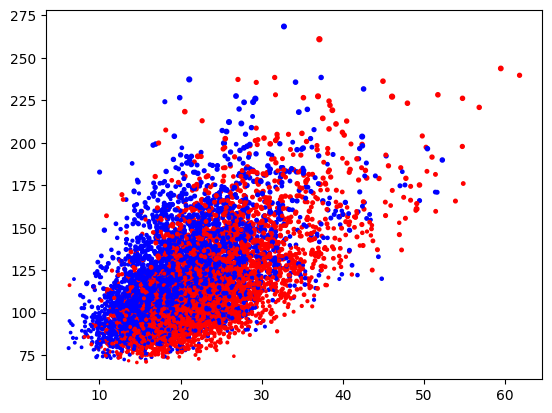

In [139]:
plt.scatter(X[:,1], X[:,2], s=2*X[:,0], c=['red' if i == 0 else 'blue' for i in y])

In [222]:
# split = int(n*0.8)
# print(split)
# df_train = df.iloc[:split,:]
# df_test = df.iloc[split:,:]
# y_train = y[:split]
# y_test = y[split:]

In [83]:
sum(y_train), sum(y_test)

(815.0, 210.0)

In [84]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(df_train)
# x_test = scaler.transform(df_test)

x_train = df_train.to_numpy()
x_test = df_test.to_numpy()

(-1.0, 10.0)

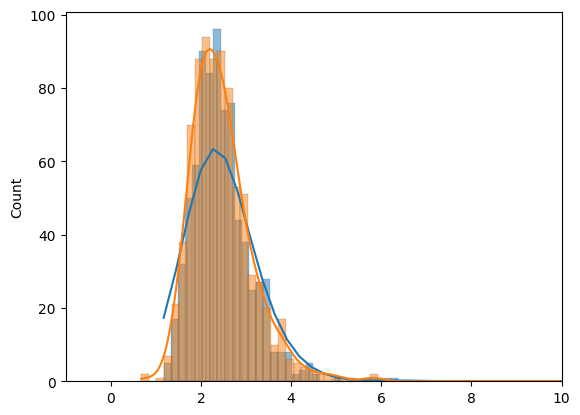

In [92]:
sns.histplot(data = x_train[:,0][np.where(y_train == 0)[0]], kde = True);
sns.histplot(data = x_train[:,0][np.where(y_train == 1)[0]], kde = True);
# plt.xlim(-.001,.006);
plt.xlim(-1,10)

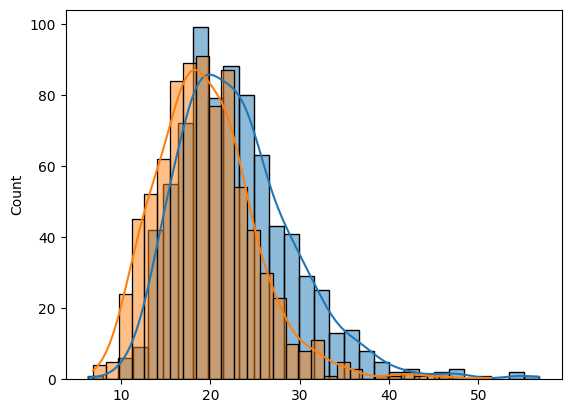

In [93]:
sns.histplot(data = x_train[:,1][np.where(y_train == 0)[0]], kde = True);
sns.histplot(data = x_train[:,1][np.where(y_train == 1)[0]], kde = True);
# plt.xlim(-.001,.006);
# plt.xlim(-1,10)

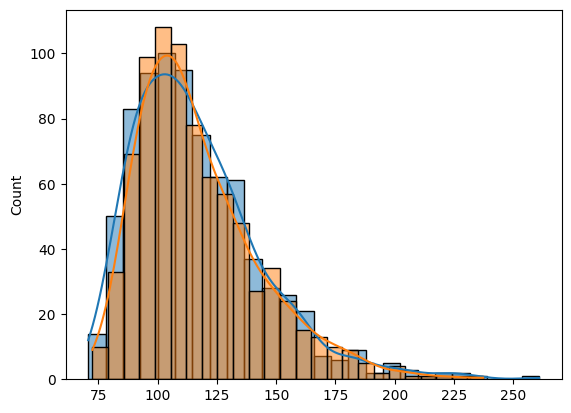

In [94]:
sns.histplot(data = x_train[:,2][np.where(y_train == 0)[0]], kde = True);
sns.histplot(data = x_train[:,2][np.where(y_train == 1)[0]], kde = True);
# plt.xlim(-.001,.006);

In [95]:
# sns.histplot(data = x_train[:,3][np.where(y_train == 0)[0]], kde = True);
# sns.histplot(data = x_train[:,3][np.where(y_train == 1)[0]], kde = True);
# plt.xlim(-5,10);

In [96]:
# sns.histplot(data = x_train[:,4][np.where(y_train == 0)[0]], kde = True);
# sns.histplot(data = x_train[:,4][np.where(y_train == 1)[0]], kde = True);
# plt.xlim(-5,10);

In [97]:
# outliers = list(np.where(x_train[:,0] > 3)[0])
# outliers += list(np.where(x_train[:,1] > 3)[0])
# outliers += list(np.where(x_train[:,2] > 3)[0])
# outliers += list(np.where(x_train[:,3] > 5)[0])
# outliers += list(np.where(x_train[:,4] > 5)[0])
# outliers = list(set(outliers))
# len(outliers)

In [98]:
# indices = np.setdiff1d(np.arange(0, len(x_train)), outliers)
# x_train, y_train = x_train[indices], y_train[indices]
# sum(y_train)

In [114]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

clf = SVC(kernel='linear', probability=True, random_state=0)
_ = clf.fit(x_train, y_train)

In [115]:
print(roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1]))
print(roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1]))

0.7238769510761387
0.7192350576604283
